<a href="https://colab.research.google.com/github/Jacob130000x/Code/blob/main/AppStsCW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def CCDF(data):
    '''
    Computes CCDF given data
    '''
    n = len(data)
    x = np.sort(data) # sort data\
    y = np.arange(1, n + 1) / n # compute cdf
    y = 1-y
    plt.plot(x, y)
    plt.grid(True)
    plt.xlabel('number of tweets')
    plt.ylabel('probability')
    plt.show()


a) Preliminaries

In [ ]:
data2 = pd.read_csv("tweet-time-series2.csv", header=None, sep=" ")


In [ ]:
data2 = data2.iloc[60000:70000, 1]

In [ ]:
data2

60000    33
60001    37
60002    27
60003    37
60004    28
         ..
69995     2
69996     1
69997     2
69998     1
69999     2
Name: 1, Length: 10000, dtype: int64

b) Selecting a model

Normal Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


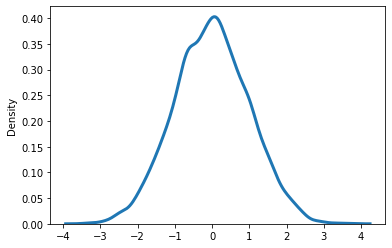

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


distribN = np.random.normal(0, 1, 10000)
sns.distplot(distribN, hist = False, kde = True, kde_kws = {'linewidth': 3})

Weibull

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


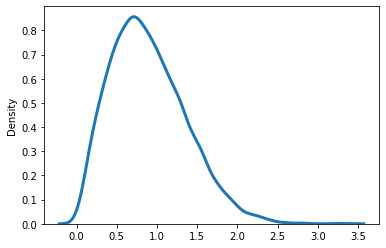

In [ ]:

distribW = np.random.weibull(2, 10000)
sns.distplot(distribW, hist = False, kde = True, kde_kws = {'linewidth': 3})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


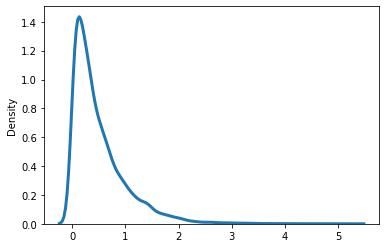

In [ ]:
import numpy as np
import seaborn as sns

DE = np.random.exponential(0.5, 10000)
sns.distplot(DE, hist = False, kde = True, kde_kws = {'linewidth': 3})

Pareto

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


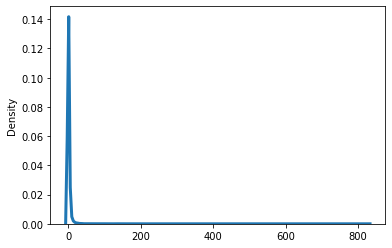

In [ ]:
import seaborn as sns


distribP = np.random.pareto(1.5, 10000)
sns.distplot(distribP, hist = False, kde = True, kde_kws = {'linewidth': 3})

CCDF Normal Distribution

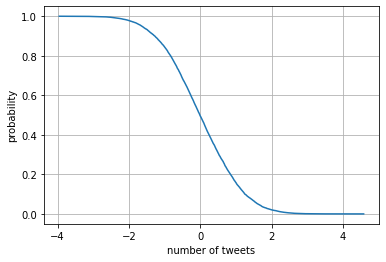

In [ ]:
CCDF(distribN)

CCDF Weibull Distribution

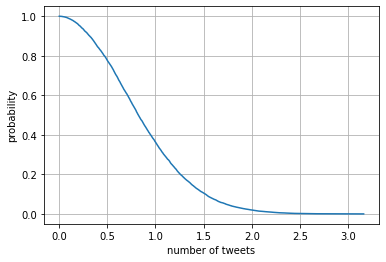

In [ ]:
CCDF(distribW)

CCDF Pareto Pareto Distribution

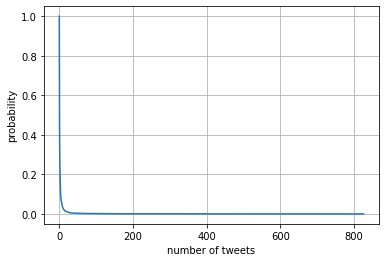

In [ ]:
CCDF(distribP)

b) Selecting a model
When observing the CCDF this data, what can you say about the distribution and its tail? To help
you, generate random numbers distributed according to Normal, Weibull, and Pareto distributions
(see lecture slides to remember how to do this), and have a look at the CCDF for them.
<br>
##Q3.1 - Model - MCQ: Choose among the following which ones seem possibly correct:
<br>
1. The tail is similar to a strict heavy-tailed distribution, i.e., it fits a straight line on the CCDF.
<br>
2. The tail is falling fast enough to be an exponential distribution.
<br>
3. The tail is falling fast enough to be either an exponential or an extreme value distribution. 

Answer: I believe number 3 to be correct
<br>
3. The tail is falling fast enough to be either an exponential or an extreme value distribution. 
<br>
As we can see the first drop followed by stagnation and then followed by another drop may suggest either one the Exponential or Extreme. 

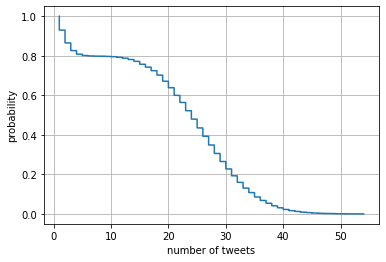

In [ ]:
CCDF(data2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


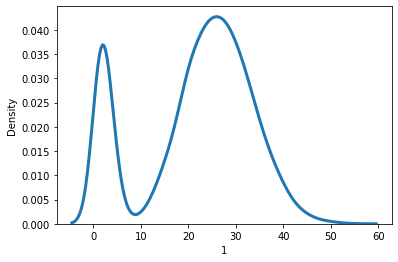

In [ ]:
import seaborn as sns


distribP = data2
sns.distplot(distribP, hist = False, kde = True, kde_kws = {'linewidth': 3})

##Q3.2 - Model - Open: When observing the CCDF of the data (not the randomly generated numbers),
what model do you think is the most relevant?

Answer: I think that out of the selected models the normal distribution is the most relevant because the distribution itself due to the fist drop suggests to be from the exponential family however in Normal Distribution it can go into negative which is not observed here. Outside from the selection of models provided the bimodal poisson distribution could fit the data best due to the data showing a number of events over time and a possible two modes  represented by the first down slope followed by the next.

c) Estimating distribution parameters
Let’s assume for now that the distribution is not a heavy-tailed one, but either an extreme value or
an exponential. This leaves with a lot of options, e.g., Weibull, Gamma, logistic, Normal, Poisson.
Now, we need to estimate the parameters of the candidate distributions, i.e., step 2 of the
methodology.
Estimate the parameters of a few candidate distributions using the maximum likelihood estimation
(MLE) method. Check the following distributions: Normal, Exponential, Gamma, and Lognorm. The
first two are exponential distributions, while the last two are extreme value distributions. 

MLE Normal Distribution

In [ ]:
import scipy 
dist = getattr(scipy.stats, 'norm')
paramN = dist.fit(data2)

In [ ]:
paramN

(21.69, 11.647896805861562)

MLE Exponential Distribution

In [ ]:
dist = getattr(scipy.stats, 'expon')
paramE = dist.fit(data2)

Object `scipy.stats` not found.


In [ ]:
paramE

(1.0, 20.69)

MLE Gamma Distribution



In [ ]:
dist = getattr(scipy.stats, 'gamma')
paramG = dist.fit(data2)

In [ ]:
paramG

(276.8794890535214, -175.3586760889923, 0.7115100785350288)

MLE Lognorm

In [ ]:
dist = getattr(scipy.stats, 'lognorm')
paramL = dist.fit(data2)

In [ ]:
paramL

(0.00713012917387662, -1617.9885155458996, 1639.6527728478004)

##Q3.3 - Estimating distribution parameters: Select which one(s) of the following assertions about the
value of the fitted parameters by MLE is (are) correct.

Correct:
1. The standard deviation fitted by MLE for the normal distribution is high, i.e., much higher than 1.



##Q3.4 - Checking the fit based on the qqplot: Based on the visual inspection of the 4 different qqplots,
which one(s) of the following assertions is (are) correct:
1. The Normal distribution fits the data well.
2. The Exponential distribution fits the data well.
3. The Gamma distribution fits the data well.
4. The Lognorm distribution fits the data well.
5. None of the mentioned distributions fit the data well.

Answer: 
<br>
the point '5. None of the mentioned distributions fit the data well.' is correct as shown above the data doesn't fit any of the models.

Normal Distribution

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


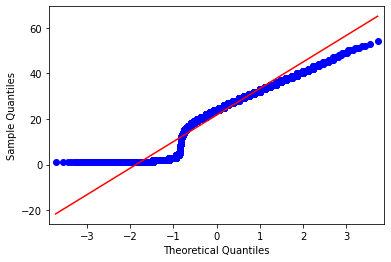

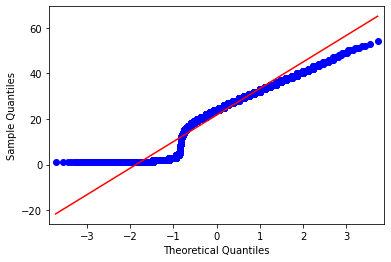

In [ ]:
from statsmodels.api import qqplot
import scipy


qqplot(data2, dist=scipy.stats.norm, line='s')

Exponential Distribution

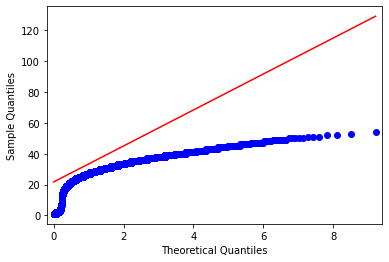

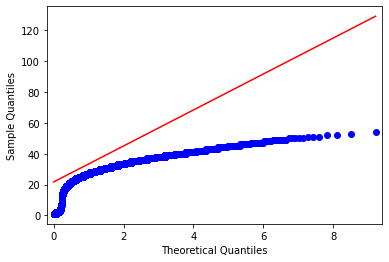

In [ ]:
qqplot(data2, dist=scipy.stats.expon, line= 's')

Gamma Distribution

In [ ]:
#Plotting Gamma Distribution
distribG = np.random.gamma(20, 1, 10000)


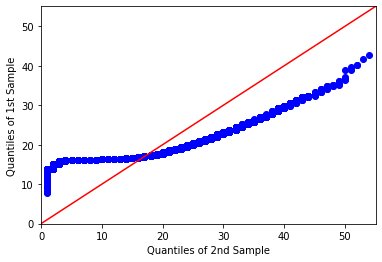

Gamma Distribution


In [ ]:

import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
x = distribG
y = data2
pp_x = sm.ProbPlot(x)
pp_y = sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y, line='45')
plt.show()
print('Gamma Distribution')

Lognorm Distrubution

In [ ]:
distribLN = np.random.lognormal(1, 1, 10000)

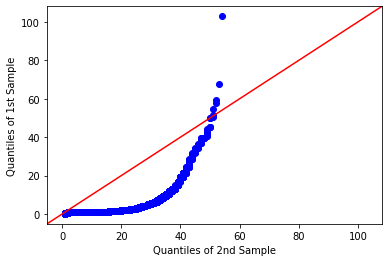

Lognorm Distribution


In [ ]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
x = distribLN
y = data2
pp_x = sm.ProbPlot(x)
pp_y = sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y, line='45')
plt.show()
print('Lognorm Distribution')

##Q3.5 - K-S test p-value: Based on the p-values returned by ks.test(), how many distributions fit the data?

All distributions are rejcting the null hypotesis meaning that they don't fit the data. 

Answer: 1. 0 Fit the data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import scipy

def ksTest(distribution, data):
    p_values = []

    dist = getattr(scipy.stats, distribution)
    param = dist.fit(data)

    p = scipy.stats.kstest(data, distribution, args=param)
    p_values.append(p)
    
    print(distribution + ': ' + str(p) + ' -- Params: ' + str(param))

In [ ]:
ksTest('norm', data2)
ksTest('expon', data2)
ksTest('gamma', data2)
ksTest('lognorm', data2)

norm: KstestResult(statistic=0.12728465248593357, pvalue=3.7810060439864886e-141) -- Params: (21.69, 11.647896805861562)
expon: KstestResult(statistic=0.2850957655169518, pvalue=0.0) -- Params: (1.0, 20.69)
gamma: KstestResult(statistic=0.1270743361069419, pvalue=1.102215515622734e-140) -- Params: (276.8794890535214, -175.3586760889923, 0.7115100785350288)
lognorm: KstestResult(statistic=0.1273355912005128, pvalue=2.9170988125764754e-141) -- Params: (0.00713012917387662, -1617.9885155458996, 1639.6527728478004)


##Q3.6 - KS-test distance: Relying on the p-value of the test is a very strict hypothesis test, given that
KS is a very sensitive test. If you were to rely only on the distance D of the KS test and not the pvalue, which distribution fits best the data?

Answer: Gamma Distribution hast the lowest maximum distance (D) meaning it is the closest to the distribution. This suggests that the data is likely to fit this distribution. 

##e) Reflection
<br>
Given that the data is likely to be distributed according to a distribution of a specific class, reflect on
what you might have done differently to improve the fit to the data. Consider the following options:

Trimming the data;
<br>
 Using a different subset of the Twitter dataset;
 <br>
 Considering additional distributions for a given class of distributions;
 <br>
 Using a different test than KS, e.g., Shapiro-Wilkes.

Answer:There are many way I could have implemented to improve the fit to the data. One of them would be to get more subsets of the Twitter dataset and using the QQplots to visually check whether the distributions are similar or if the a number of different subsets match eachother to see what's the likely distribution of the whole population. I could also use the KS test to compare the distributions to see whether they are the same even if the shape of the distributions is different. This would allow me to see if I need to look into trying to fit the data into a different distributions if the selected subsents turned out to not fit the same distribution as the first subset. I wouldn't have used the Shapiro-Wilk test on the data as we have a specified mean and variance for this data. The Chi- Square would also wouldn't be useful as the data is not binned, binning the data would affect the Chi-square test depending on how it has been binned.
As based on the graphs such as the qq plot I can see that there are some extreme values I could implement triming on the sets of data and compare them again in order to see whether or not they now fit better. Doing that I need to be councious to only trim the extreme values in order to not misinterpret the distribution.

##Q3.7 - Which one(s) of these options would you be willing to rely on, and which one(s) do you
believe might have made a difference in the outcome of the fitting attempt? 

Answer: I would rely on trimming the extreme value as this would give me a better view of the fitment of the model especially when compared to the subsets of different twitter dataset. Box plots could have been used to visulise the extreme values and give us an idea of the spread of the distribution before trimming in order to make sure the the possible bimodal distribution isn't trimmed to the point where one of smaller mode is discarded.

Comparing the disrtibutions of the trimmed subsets of a different dataset to our data would give us an idea whether in general the fitment of the data to a particular distribution is correct and what the possible distribution of the whole possible could be . This could have been done through comparing the subsets with QQplots and KS Test comparing the distributions.  If it turns out that the distributions do not match, I could look into seeing the fitment to different distributions such as weibull or poisson/bimodal poisson distributions to see if they fit better rather than limiting myself to the 4 tested.